### First Model Iteration

### Vanilla MultiClass Logistic Classification
 - Using just one labeled dataset of fire weather index risk - categorical variables
 - Multiclass Classification Model to Predict 5 Classes of fire_weather: ['fwi_low', 'fwi_high', 'fwi_veryhigh', 'fwi_moderate', 'fwi_extreme']
 - Multiclass as in each sample can only be assigned 1 class (versus multilabel)
 - Dropping longitude and latitude values (next iteration may explore feature engineering)

In [123]:
# import libraries
import pandas as pd
import xarray as xr
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score

from yellowbrick.classifier import ConfusionMatrix

In [105]:
# import data
fwi = pd.read_csv('../../finalproj_data/csv/fwi.csv')
fwi.drop('Unnamed: 0', axis = 1, inplace = True)

In [106]:
# check class imbalance
fwi['fire_weather'].value_counts()

fwi_extreme     8199
fwi_low         2802
fwi_veryhigh     551
fwi_high         367
fwi_moderate     186
Name: fire_weather, dtype: int64

In [107]:
X = fwi.drop(['fire_weather', 'lat', 'lon'], axis = 1)
y = fwi['fire_weather']

In [108]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [109]:
# Standard Scale
# Only fit on training data
# Transform both
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [112]:
# Try vanilla Logistic Regression model
lg = LogisticRegression(max_iter = 10000)
lg.fit(x_train, y_train)
y_pred = lg.predict(x_train)

In [113]:
# Evaluate Metrics (that work for multiclass classification)
# See: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
accuracy = balanced_accuracy_score(y_train, y_pred)
print(accuracy)

0.7894987853436042


C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


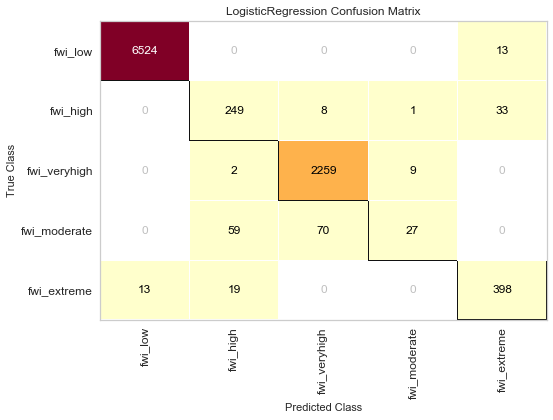

In [135]:
cm_train = ConfusionMatrix(lg, classes =['fwi_low', 'fwi_high', 'fwi_veryhigh', 'fwi_moderate', 'fwi_extreme'])
cm_train.score(x_train, y_train)
cm_train.show()

C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


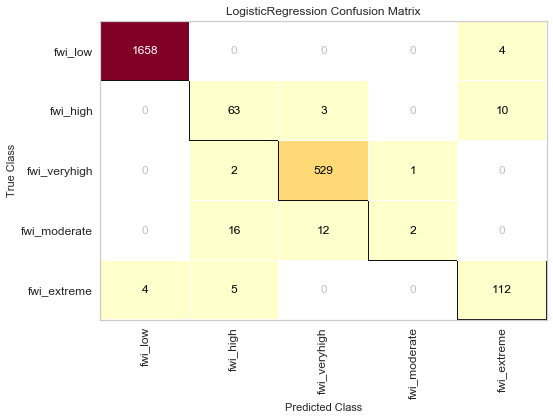

In [134]:
# Visualize CM with Yellowbrick and prefitted model

cm = ConfusionMatrix(lg, classes =['fwi_low', 'fwi_high', 'fwi_veryhigh', 'fwi_moderate', 'fwi_extreme'])
cm.score(x_test, y_test)
cm.show()

In [124]:
# to calculate roc_auc score I think I have to binarize the labels
y_pred_ = label_binarize(y_pred, classes =['fwi_low', 'fwi_high', 'fwi_veryhigh', 'fwi_moderate', 'fwi_extreme'])
y_train_ = label_binarize(y_train, classes =['fwi_low', 'fwi_high', 'fwi_veryhigh', 'fwi_moderate', 'fwi_extreme'])

In [132]:
# using weighted average

roc_auc_score(y_train_, y_pred_, average = 'weighted')

0.9854055513352264